# Check dataset content  
症例数等データセットの詳細を確認

In [53]:
import os
import tensorflow as tf
import glob
from tqdm import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import gaussian_filter, map_coordinates
import numpy as np
import math
from scipy.signal import convolve2d
import scipy.misc

In [54]:
label_dir = '../datasets/label_images_formatted'
label_image_path_list = glob.glob(label_dir+'/*')

## Check number of cases 

### Total (Normal and Tumor)

In [55]:
len(label_image_path_list)

2028

### Normal

In [56]:
normal_case_label_image_path_list = [path for path in label_image_path_list if 'N' in path and 'T' not in path]
len(normal_case_label_image_path_list)

1015

In [58]:
normal_case_ids = ['_'.join(os.path.basename(path).split('_')[:1]) for path in normal_case_label_image_path_list]
print('number of unique normal case ids', len(set(normal_case_ids)))

number of unique normal case ids 1008


### Tumor

In [43]:
tumor_case_label_image_path_list = [path for path in label_image_path_list if 'T' in path and 'N' not in path]
len(tumor_case_label_image_path_list)

1006

In [59]:
tumor_case_ids = ['_'.join(os.path.basename(path).split('_')[:1]) for path in tumor_case_label_image_path_list]
print('number of unique tumor case ids', len(set(tumor_case_ids)))

number of unique tumor case ids 995


### Number cases in common with Tumor and Normal

In [60]:
len(set(tumor_case_ids) & set(normal_case_ids))

963

### Unknown

In [7]:
unknown_label_image_path_list = [path for path in label_image_path_list if ('T' not in path and 'N' not in path) or ('T'in path and 'N' in path)]
len(unknown_label_image_path_list)

7

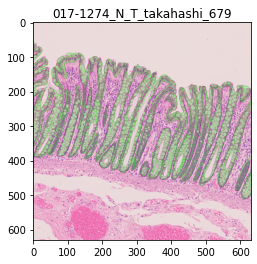

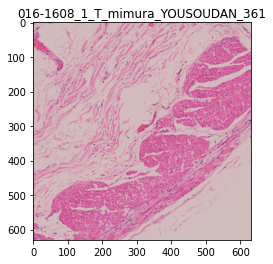

../datasets/label_images_formatted/013-1290_4_hara_NT_unknown_2129.png


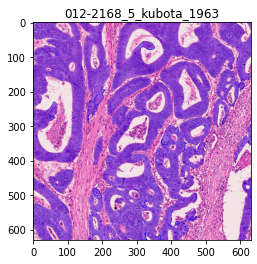

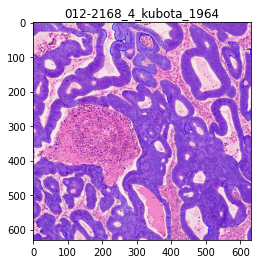

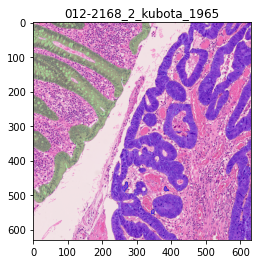

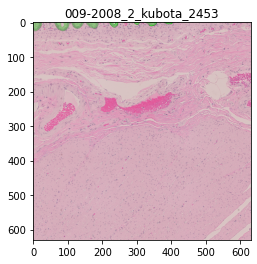

In [68]:
image_dir = '../datasets/pathological_images_JPEG'
image_ext = '.jpg'

for label_path in unknown_label_image_path_list:
    try: 
        label_image = Image.open(label_path)
        image_name = os.path.splitext(os.path.basename(label_path))[0]
        image_path = os.path.join(image_dir, image_name + image_ext)
        image = Image.open(image_path).resize(label_image.size)
        plt.imshow(image)
        plt.imshow(label_image)
        plt.title(image_name)
        plt.show()
    except:
        print(label_path)

## Check area ratio of each category (Normal, Tumor, Adenoma, Not for use)

In [9]:
num_adenoma_contained_images = 0
num_tumor_contained_images = 0
num_normal_contained_images = 0
num_unuse_contained_images = 0
black_areas = []
blue_areas = []
green_areas = []
blue_green_areas = []
for label_image_path in tqdm(label_image_path_list):
    label_image = Image.open(label_image_path)
    label_image_array = np.array(label_image)
    black = np.logical_and(
        np.logical_and(
            label_image_array[:, :, 1] == 0,
            label_image_array[:, :, 2] == 0
        ),
        label_image_array[:, :, 3] == 255
    )
    black_areas.append(np.sum(black))
    blue = np.logical_and(
        np.logical_and(
            label_image_array[:, :, 1] == 0,
            label_image_array[:, :, 2] != 0
        ),
        label_image_array[:, :, 0] == 0
    )
    blue_areas.append(np.sum(blue))
    green = np.logical_and(
        np.logical_and(
            label_image_array[:, :, 1] != 0,
            label_image_array[:, :, 2] == 0
        ),
        label_image_array[:, :, 0] == 0
    )
    green_areas.append(np.sum(green))
    blue_green =np.logical_and(
        np.logical_and(
            label_image_array[:, :, 1] != 0,
            label_image_array[:, :, 2] != 0
        ),
        label_image_array[:, :, 0] == 0
    )
    blue_green_areas.append(np.sum(blue_green))
    
    if np.sum(blue_green):
        num_adenoma_contained_images += 1
    if np.sum(blue):
        num_tumor_contained_images += 1
    if np.sum(green):
        num_normal_contained_images += 1
    if np.sum(black):
        num_unuse_contained_images += 1

100%|██████████| 2028/2028 [00:29<00:00, 67.88it/s]


In [10]:
total_area = len(label_image_path_list)*630*630
print('tumor -> ', 100*np.sum(blue_areas)/total_area, '%')
print('normal -> ', 100*np.sum(green_areas)/total_area, '%')
print('adenoma -> ', 100*np.sum(blue_green_areas)/total_area, '%')
print('not for use -> ', 100*np.sum(black_areas)/total_area, '%')

tumor ->  19.697462036900376 %
normal ->  14.101468456474562 %
adenoma ->  0.8602467943127283 %
not for use ->  4.754555273786043 %


## Check number of image which contains Normal, Tumor, Adenoma, or Not for use

In [12]:
print('tumor -> ', num_tumor_contained_images)
print('normal -> ', num_normal_contained_images)
print('adenoma -> ', num_adenoma_contained_images)
print('not for use -> ', num_unuse_contained_images)

tumor ->  905
normal ->  1027
adenoma ->  91
not for use ->  430
